<h1>Disentangling the Labour Share story</h1> 

<center>Pau Belda-i-Tortosa</center> |


<center>November 2018</center>

<h2>Exercise 1: Workers' agencies flows  </h2> 
**Data:**
- Unemployment Insurance (from Personal current transfer receipts, Government social benefits to persons. Billions of Dollars, Annual (1937-2017), Not Seasonally Adjusted).

- Labor Organization Dues (from Personal consumption expenditures. Billions of Dollars, Annual (1959-2017), Not Seasonally Adjusted).

- Professional Association Dues (from Personal consumption expenditures. Billions of Dollars, Annual (1959-2017), Not Seasonally Adjusted). 

- GDP (Billions of Dollars, Annual (1937-2017)). 

Source: NIPA, BEA. 

**Results:**

**1.- Trends**
- UI/GDP: no clear trend. If something, fluctuating around a constant, 0.4% of the GDP. 
- LOD/GDP: slightly increasing until '90, but strongly decreasing since then, from 0.14% in 1991 to 0.07% in 2017. 
- PAD/GDP: steadily increasing along the whole serie. (see graph 7).  

In a sense there is a convergence process between LOD (from above) and PAD (from below). It could point out the crisis of the working class organizations and the rise of professional middle class corporative agencies. It could be a reflection of the reduction of industrial employment and the steadily rise in white collars jobs. Etc. 

**2.- Cyclical properties**
- UI is countercyclical (both UI and UI/GDP). This is what is expected. 
- LOD is slightly procyclical, but LOD/GDP is clearly countercyclical. 
- PAD is procyclical, but PAD/GDP is countercyclical.

In good times people resort less to agencies. 


In [6]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm


#Import data
data=pd.read_csv('Expenditures.csv', header=0)

#Extract the time series of each variable
time= data['observation_date']
UI = data['UI']
LOD= data.iloc[22:81,2]
PAD= data.iloc[22:81,3]
GDP = data['GDP']
UI_GDP = data['UI/GDP']
LOD_GDP = data.iloc[22:81,6]
PAD_GDP = data.iloc[22:81,7]

#Apply the HP filter. 
UI_c, UI_t = sm.tsa.filters.hpfilter(UI, 6.25)
LOD_c, LOD_t = sm.tsa.filters.hpfilter(LOD, 6.25)
PAD_c, PAD_t = sm.tsa.filters.hpfilter(PAD, 6.25)
GDP_c, GDP_t = sm.tsa.filters.hpfilter(GDP, 6.25)
UI_GDP_c, UI_GDP_t = sm.tsa.filters.hpfilter(UI_GDP, 6.25)
LOD_GDP_c, LOD_GDP_t = sm.tsa.filters.hpfilter(LOD_GDP, 6.25)
PAD_GDP_c, PAD_GDP_t = sm.tsa.filters.hpfilter(PAD_GDP, 6.25)

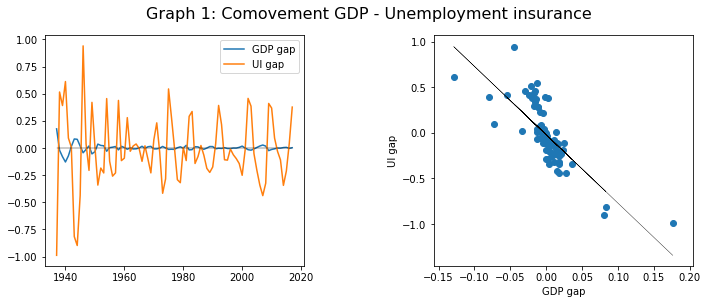

In [4]:
GDP_gap=(GDP - GDP_t)/GDP_t
UI_gap=(UI - UI_t)/UI_t
line=np.zeros((81))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 1: Comovement GDP - Unemployment insurance', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time,GDP_gap, label='GDP gap')
plt.plot(time,UI_gap, label='UI gap')
plt.plot(time,line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap,UI_gap)
plt.xlabel('GDP gap')
plt.ylabel('UI gap')
z = np.polyfit(GDP_gap,UI_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap,p(GDP_gap), 'k', linewidth=0.4)

In [5]:
cor=np.corrcoef(GDP_gap,UI_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP_gap,UI_gap) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP_gap,UI_gap) is: -0.78


A variable is countercyclical if its deviations from trend are negatively correlated with the output gap. As expected, UI behaves countercyclical. 

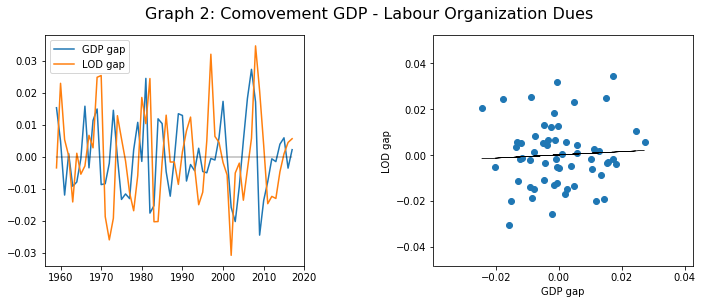

In [126]:
LOD_gap=(LOD - LOD_t)/LOD_t
line=np.zeros((59))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 2: Comovement GDP - Labour Organization Dues', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time[22:81],GDP_gap[22:81], label='GDP gap')
plt.plot(time[22:81],LOD_gap, label='LOD gap')
plt.plot(time[22:81],line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap[22:81],LOD_gap)
plt.xlabel('GDP gap')
plt.ylabel('LOD gap')
z = np.polyfit(GDP_gap[22:81],LOD_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap[22:81],p(GDP_gap[22:81]), 'k', linewidth=0.4)


In [113]:
cor=np.corrcoef(GDP_gap[22:81],LOD_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP,LOD) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP,LOD) is: 0.06


LOD behaves slightly procyclically.

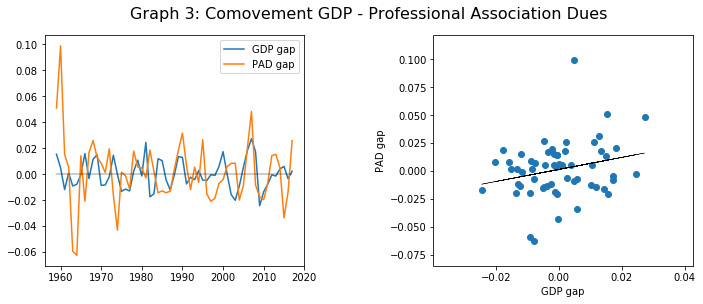

In [116]:
PAD_gap=(PAD - PAD_t)/PAD_t
line=np.zeros((59))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 3: Comovement GDP - Professional Association Dues', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time[22:81],GDP_gap[22:81], label='GDP gap')
plt.plot(time[22:81],PAD_gap, label='PAD gap')
plt.plot(time[22:81],line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap[22:81],PAD_gap)
plt.xlabel('GDP gap')
plt.ylabel('PAD gap')
z = np.polyfit(GDP_gap[22:81],PAD_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap[22:81],p(GDP_gap[22:81]), 'k', linewidth=0.4)

In [117]:
cor=np.corrcoef(GDP_gap[22:81],PAD_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP,PAD) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP,PAD) is: 0.25


The Professional Association Dues behaves procyclically, which basically points out the existence of an upward trend (like in the GDP). 

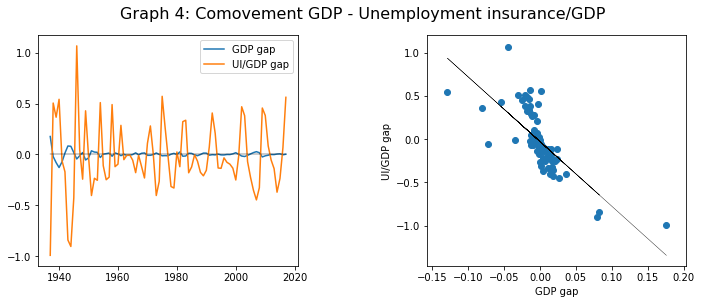

In [123]:
UI_GDP_gap=(UI_GDP - UI_GDP_t)/UI_GDP_t
line=np.zeros((81))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 4: Comovement GDP - Unemployment insurance/GDP', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time,GDP_gap, label='GDP gap')
plt.plot(time,UI_GDP_gap, label='UI/GDP gap')
plt.plot(time,line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap,UI_GDP_gap)
plt.xlabel('GDP gap')
plt.ylabel('UI/GDP gap')
z = np.polyfit(GDP_gap,UI_GDP_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap,p(GDP_gap), 'k', linewidth=0.4)

In [125]:
cor=np.corrcoef(GDP_gap,UI_GDP_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP,UI) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP,UI) is: -0.74


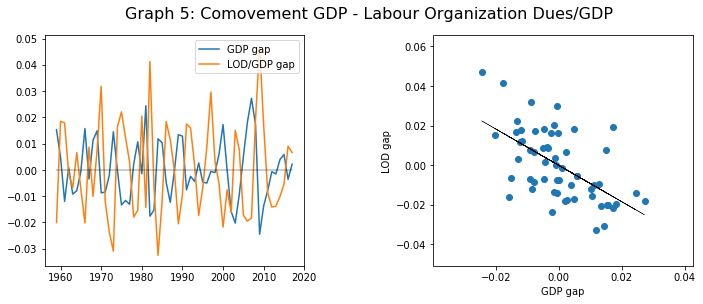

In [127]:
LOD_GDP_gap=(LOD_GDP - LOD_GDP_t)/LOD_GDP_t
line=np.zeros((59))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 5: Comovement GDP - Labour Organization Dues/GDP', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time[22:81],GDP_gap[22:81], label='GDP gap')
plt.plot(time[22:81],LOD_GDP_gap, label='LOD/GDP gap')
plt.plot(time[22:81],line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap[22:81],LOD_GDP_gap)
plt.xlabel('GDP gap')
plt.ylabel('LOD gap')
z = np.polyfit(GDP_gap[22:81],LOD_GDP_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap[22:81],p(GDP_gap[22:81]), 'k', linewidth=0.4)

In [128]:
cor=np.corrcoef(GDP_gap[22:81],LOD_GDP_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP,LOD) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP,LOD) is: -0.59


Now is clearly countercyclical! Note that it is so because the growth of LOD is much lower than the GDP growth. 

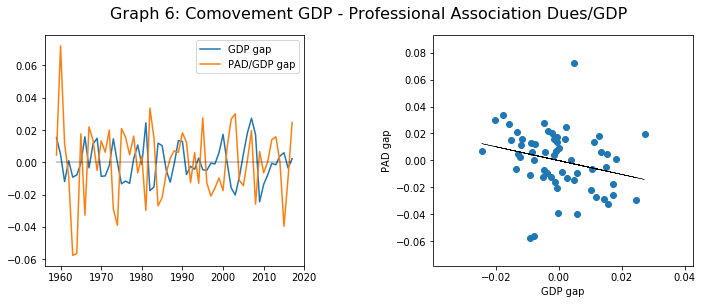

In [131]:
PAD_GDP_gap=(PAD_GDP - PAD_GDP_t)/PAD_GDP_t
line=np.zeros((59))

plt.figure
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.suptitle('Graph 6: Comovement GDP - Professional Association Dues/GDP', x=0.75, y=1, fontsize=16)

plt.subplot(121)
plt.plot(time[22:81],GDP_gap[22:81], label='GDP gap')
plt.plot(time[22:81],PAD_GDP_gap, label='PAD/GDP gap')
plt.plot(time[22:81],line, 'k', linewidth=0.4)
plt.legend()


plt.subplot(122)
plt.scatter(GDP_gap[22:81],PAD_GDP_gap)
plt.xlabel('GDP gap')
plt.ylabel('PAD gap')
z = np.polyfit(GDP_gap[22:81],PAD_GDP_gap,1)
p = np.poly1d(z)
plt.plot(GDP_gap[22:81],p(GDP_gap[22:81]), 'k', linewidth=0.4)

In [133]:
cor=np.corrcoef(GDP_gap[22:81],PAD_GDP_gap)
corr=cor[0,1]
print('The correlation coefficient (GDP,PAD) is: '"{0:.2f}".format(corr))

The correlation coefficient (GDP,PAD) is: -0.26


Countercyclical!

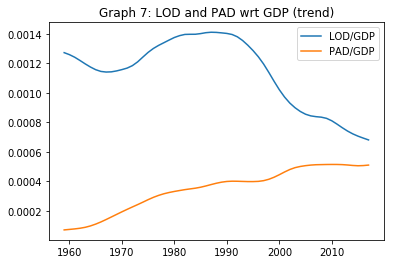

In [11]:
plt.plot(time[22:81], LOD_GDP_t, label='LOD/GDP')
plt.plot(time[22:81], PAD_GDP_t, label='PAD/GDP')
plt.title('Graph 7: LOD and PAD wrt GDP (trend)')
plt.legend()

Text(0.5,1,'Graph 8: UI wrt GDP (trend)')

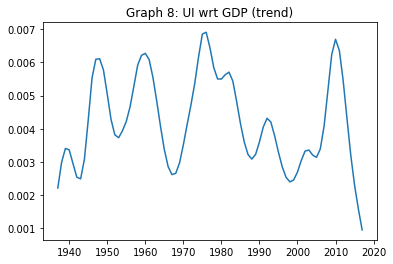

In [9]:
plt.plot(time,UI_GDP_t)
plt.title('Graph 8: UI wrt GDP (trend)')

<h2>Exercise 2: Trade Unions & Distribution   </h2>

In this part we gathered a bunch of data, mainly regarding the workers organization a:
- Membership rate
- Coverage rate
- Strikes (more than 1000 workers involved). 
- Industrial employment share
- Adjusted Labour Share (complement of capital share, as in Koh et al. (2016))

The data gives us the following information:
- Both, the membership rate and the ALS described a U-inverted shape. 
- There is a strong positive correlation between the membership rate, the number of strikes and the share of industrial in total employment. 

Two main stories could be back by this evidence:
- Class Struggle/Bargaining/Marxist theory of distribution.
- Structuralist/Kuznetian theory of distribution. 

In [23]:
#Import data
data1=pd.read_csv('Measures.csv', header=2)
data1.fillna(0) #No data = 0 (to be able to plot different time series)

#Extract the time series of each variable
time= data1['time']
MR = data1['MR nonagri']
MR_I=data1['MR Index']
Cov=data1.iloc[0:121,3]
Strikes=data1.iloc[0:121,4]
Strikes_I=data1.iloc[0:121,5]
IShare=data1.iloc[0:121,6]
IShare_I=data1.iloc[0:121,7]
ALS=data1.iloc[0:121,8]
ALS_I=data1.iloc[0:121,9]
Pre_LS=data1.iloc[0:121,9]
Pre_LS_I=data1.iloc[0:121,10]
ILS=data1.iloc[0:121,11]
#data.head()

(121,)

Text(0.5,1,'Graph 1: Unions & Employment (1947=100)')

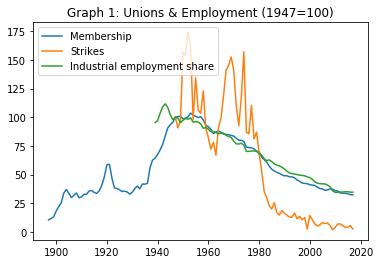

In [25]:
plt.plot(time,MR_I, label='Membership')
plt.plot(time,Strikes_I, label='Strikes')
plt.plot(time,IShare_I, label='Industrial employment share')
plt.legend()
plt.title('Graph 1: Unions & Employment (1947=100)')

In [28]:
cor=np.corrcoef(MR_I[42:121],IShare_I[42:121])
corr=cor[0,1]
print('The correlation coefficient (Membership,Industrial Employemnt) is: '"{0:.2f}".format(corr))

The correlation coefficient (Membership,Industrial Employemnt) is: 0.94


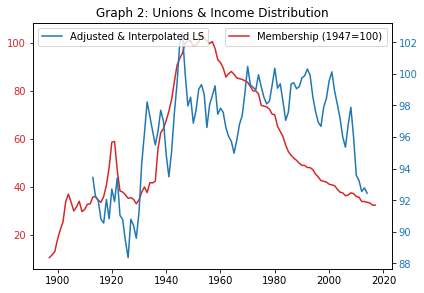

In [35]:
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.plot(time, MR_I, color=color, label='Membership (1947=100)')
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(time, ILS, color=color, label='Adjusted & Interpolated LS')
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=2)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title('Graph 2: Unions & Income Distribution')
plt.show()